## Introduction

In this notebook, the traveldemand survey data is analyzed to determine how much progress has been made since 
the implementation of the TfL strategy.

The data is retrieved from the Travel Demand survey with a sample size of 8000 households https://tfl.gov.uk/corporate/about-tfl/how-we-work/planning-for-the-future/consultations-and-surveys

The date range is from 2010-2020 as there is no later data available. 

In [1]:
# Import the libraries
import pandas as pd
import numpy as np

traveldemand = pd.read_excel('london_travel_demand.xlsx')

traveldemand.describe()
traveldemand.head(40)

,Area,Travelmode,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Inner London,National Rail,347319,347379,382942,406607,420772,427872,434300,417081,445047,485672,412808
1,Inner London,Underground/DLR,725466,817964,832450,935765,874149,972411,970933,966534,998850,963060,1001726
2,Inner London,Bus/tram,1315588,1450570,1417383,1400008,1439217,1362507,1342014,1143539,1141730,1164427,1162565
3,Inner London,Taxi/other,139869,137925,153049,141712,152731,130696,176056,168789,196113,141687,147278
4,Inner London,Car driver,1135065,1068940,1135526,1083251,1152769,969479,1066998,969054,985114,921616,822778
5,Inner London,Car passenger,527287,578711,579352,556462,639893,554717,548282,495337,548287,488717,452071
6,Inner London,Motorcycle,34778,27370,35847,41702,22863,24131,50915,35528,25976,25462,22493
7,Inner London,Cycle,202349,226233,338360,308082,312171,323488,274818,290407,306746,322921,317471
8,Inner London,Walk,2605187,2695657,2894453,3024525,2950001,2858779,2745817,3004203,2684616,2812690,3137608
9,Inner London,All,7032908,7350749,7769360,7898115,7964565,7624079,7610132,7490473,7332478,7326252,7476797


In [17]:
# Melt the dataframe from wide to long
traveldemand_long = traveldemand.melt(id_vars = ["Area", "Travelmode"])
traveldemand_long

,Area,Travelmode,variable,value
0,Inner London,National Rail,2010,347319
1,Inner London,Underground/DLR,2010,725466
2,Inner London,Bus/tram,2010,1315588
3,Inner London,Taxi/other,2010,139869
4,Inner London,Car driver,2010,1135065
...,...,...,...,...
215,Outer London,Car passenger,2020,1549478
216,Outer London,Motorcycle,2020,24410
217,Outer London,Cycle,2020,173838
218,Outer London,Walk,2020,3168039


In [18]:
traveldemand_long.rename(columns ={'variable' : 'year'}, inplace = True)
traveldemand_long

,Area,Travelmode,year,value
0,Inner London,National Rail,2010,347319
1,Inner London,Underground/DLR,2010,725466
2,Inner London,Bus/tram,2010,1315588
3,Inner London,Taxi/other,2010,139869
4,Inner London,Car driver,2010,1135065
...,...,...,...,...
215,Outer London,Car passenger,2020,1549478
216,Outer London,Motorcycle,2020,24410
217,Outer London,Cycle,2020,173838
218,Outer London,Walk,2020,3168039


In [19]:
# Subset the dataframe to split between inner and outer london
inner_london = traveldemand_long.loc[traveldemand_long["Area"] == "Inner London"]
print(inner_london)

outer_london = traveldemand_long.loc[traveldemand_long["Area"] == "Outer London"]
print(outer_london)

             Area       Travelmode  year    value
0    Inner London    National Rail  2010   347319
1    Inner London  Underground/DLR  2010   725466
2    Inner London         Bus/tram  2010  1315588
3    Inner London       Taxi/other  2010   139869
4    Inner London       Car driver  2010  1135065
..            ...              ...   ...      ...
205  Inner London    Car passenger  2020   452071
206  Inner London       Motorcycle  2020    22493
207  Inner London            Cycle  2020   317471
208  Inner London             Walk  2020  3137608
209  Inner London              All  2020  7476797

[110 rows x 4 columns]
             Area       Travelmode  year     value
10   Outer London    National Rail  2010    502227
11   Outer London  Underground/DLR  2010    582911
12   Outer London         Bus/tram  2010   1321715
13   Outer London       Taxi/other  2010     74518
14   Outer London       Car driver  2010   3417297
..            ...              ...   ...       ...
215  Outer London  

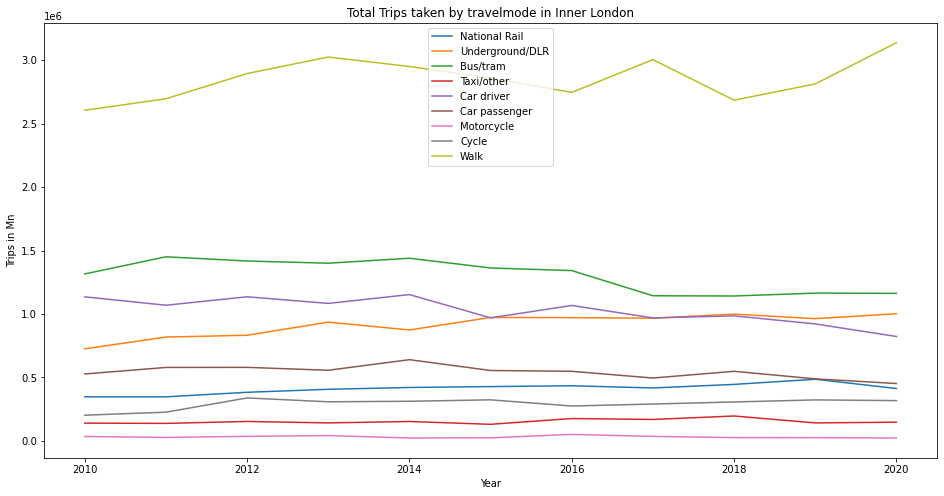

In [20]:
# Visualize the number of trips with seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Determine the size of the plot 
fig, temp_ax = plt.subplots()
fig.set_size_inches(16, 8)

# Visualize the inner london data
sns.lineplot(x = 'year', 
             y = 'value', 
             hue = 'Travelmode',
             data = inner_london[inner_london['Travelmode'] != "All"])



# Add Titles and labels
temp_ax.set_title('Total Trips taken by travelmode in Inner London')
temp_ax.set_xlabel('Year')
temp_ax.set_ylabel('Trips in Mn')
temp_ax.legend(loc = 'best')

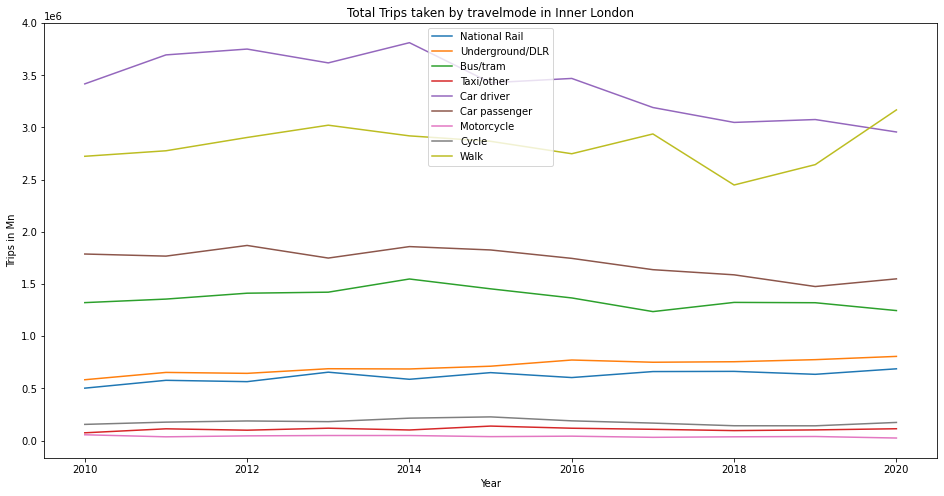

In [21]:
# Perform the same with the outer London Data
# Visualize the inner london data

fig, temp_ax = plt.subplots()
fig.set_size_inches(16, 8)
sns.lineplot(x = 'year', 
             y = 'value', 
             hue = 'Travelmode',
             data = outer_london[outer_london['Travelmode'] != "All"])



# Add Titles and labels
temp_ax.set_title('Total Trips taken by travelmode in Inner London')
temp_ax.set_xlabel('Year')
temp_ax.set_ylabel('Trips in Mn')
temp_ax.legend(loc = 'best')

In [3]:
# Create another dataframe that combines both the inner and outer london subsets
london_all = traveldemand.drop(columns = ['Area'])

# Groupby to create the full picture
london_all = london_all.groupby(by = ['Travelmode']).sum()

london_all

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Travelmode,,,,,,,,,,,
All,17653308,18500874,19246683,19400724,19740639,18966737,18665208,18210394,17433433,17535504,18202067
Bus/tram,2637303,2806137,2829366,2821797,2987291,2816304,2708612,2379287,2465558,2485146,2408046
Car driver,4552362,4763938,4886381,4701672,4964767,4397621,4536492,4159885,4033296,3997311,3779301
Car passenger,2314611,2345919,2448757,2305073,2498416,2380929,2293909,2132664,2136301,1964598,2001549
Cycle,357458,402952,526273,489427,527003,550433,463872,457926,448902,464439,491309
Motorcycle,90409,63388,80988,90278,71358,62031,93195,66699,62120,64521,46903
National Rail,849546,924691,947519,1061933,1007983,1078946,1038097,1078265,1108070,1120514,1100396
Taxi/other,214387,250753,252529,260354,254256,269608,294398,276835,291703,244046,260662
Underground/DLR,1308377,1470972,1476535,1624123,1560290,1684928,1742812,1717021,1754285,1738332,1808255


In [11]:
london_trans = np.transpose(london_all)
london_trans['total_cars'] = london_trans['Car passenger'] + london_trans['Car driver']
london_trans['car percentage'] = london_trans['total_cars'] / london_trans['All']
london_trans

Travelmode,All,Bus/tram,Car driver,Car passenger,Cycle,Motorcycle,National Rail,Taxi/other,Underground/DLR,Walk,total_cars,car percentage
2010,17653308,2637303,4552362,2314611,357458,90409,849546,214387,1308377,5328854,6866973,0.388991
2011,18500874,2806137,4763938,2345919,402952,63388,924691,250753,1470972,5472123,7109857,0.384298
2012,19246683,2829366,4886381,2448757,526273,80988,947519,252529,1476535,5798337,7335138,0.381112
2013,19400724,2821797,4701672,2305073,489427,90278,1061933,260354,1624123,6046066,7006745,0.361159
2014,19740639,2987291,4964767,2498416,527003,71358,1007983,254256,1560290,5869277,7463183,0.378062
2015,18966737,2816304,4397621,2380929,550433,62031,1078946,269608,1684928,5725938,6778550,0.357391
2016,18665208,2708612,4536492,2293909,463872,93195,1038097,294398,1742812,5493823,6830401,0.365943
2017,18210394,2379287,4159885,2132664,457926,66699,1078265,276835,1717021,5941811,6292549,0.345547
2018,17433433,2465558,4033296,2136301,448902,62120,1108070,291703,1754285,5133199,6169597,0.353895
2019,17535504,2485146,3997311,1964598,464439,64521,1120514,244046,1738332,5456599,5961909,0.339991


Text(0, 0.5, 'Trips in Mn')

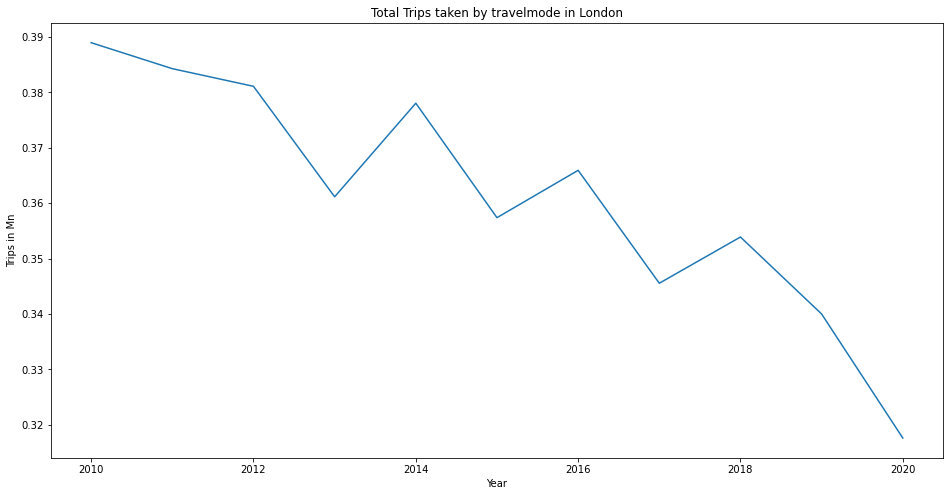

In [25]:
# Visualize the percentage of trips made by car in a lineplot

fig, temp_ax = plt.subplots()
fig.set_size_inches(16, 8)
sns.lineplot(x = london_trans.index, 
             y = london_trans['car percentage'], 
             data = london_trans)



# Add Titles and labels
temp_ax.set_title('Total Trips taken by travelmode in London')
temp_ax.set_xlabel('Year')
temp_ax.set_ylabel('Trips in Mn')